In [1]:
!pip install gymnasium matplotlib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827620 sha256=8349e6d5e99f31b57587964f661d5878b8bc2a3039b569aa21077904a0965fd8
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import pygame
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import cv2
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/RL1/images

Mounted at /content/drive
/
/content/drive/MyDrive/RL1/images


#**Deterministic Environment**

#Welcome aboard! For my environment I've presented a very famous PS4-PS5 game scenario, i.e. God of War 4 and Ragnarök (A game based on the intersection of greek and norse mythology).

###Basically Kratos (our agent) is the God of War in Greek mythology, Odin is the king of all gods in norse mythology along with his sons; thor, baldur who are the gods in norse mythology. They seek out to prevent kratos to seek out his son atrues so the gods in norse mythology are the enemies of kratos and atrues.

######In this environment we have our own mighty sparta **"AGENT"** name **Kratos** who always looks out for his son **Atrues** which happens to be our **"TARGET"**, followed by the **"REWARD"** which is **mead** (alcohol that was widely consumed back in greece and norse mythology)

In [4]:
class GodOfWar(gym.Env):

  metadata = {'render.modes': []}

  def __init__(self):
    self.environment_width = 4
    self.environment_height = 4
    self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)
    self.action_space = spaces.Discrete(4)

    self.timestep = 0
    self.max_timesteps = 20

  def reset(self):

    self.kratos_pos = np.asarray([0, 0]) #Agent initial position
    self.atrues_pos = np.asarray([3,2]) #Target position
    self.odin_pos = np.asarray([0,2]) #Obstacle1 position
    self.thor_pos = np.asarray([2,0]) #Obstacle2 position
    self.baldur_pos = np.asarray([1,3]) #Obstacle3 position
    self.mead_pos = np.asarray([[3,3], [3,0], [1,1], [0,3]]) #Rewards position

    self.timestep = 0
    obs = self.kratos_pos
    return obs

  def step(self,action):

    if action == 0:
      self.kratos_pos[0] += 1  #This action causes the agent to go right.
    if action == 1:
      self.kratos_pos[0] -= 1  #This action causes the agent to go left.
    if action == 2:
      self.kratos_pos[1] += 1  #This action causes the agent to go up.
    if action == 3:
      self.kratos_pos[1] -= 1. #This action causes the agent to go down.

    self.kratos_pos = np.clip(self.kratos_pos, 0, 3)
    obs = self.kratos_pos

    reward = 0

    #Reward for finding atrues
    if np.array_equal(self.kratos_pos, self.atrues_pos):
      reward = 100

    #Penalty for encountering Odin
    elif np.array_equal(self.kratos_pos, self.odin_pos):
        reward = -50

    #Penalty for encountering Thor
    elif np.array_equal(self.kratos_pos, self.thor_pos):
        reward = -30

    #Penalty for encountering Baldur
    elif np.array_equal(self.kratos_pos, self.baldur_pos):
        reward = -20

    #Reward for finding mead at different positions
    elif np.array_equal(self.kratos_pos, self.mead_pos[0]): # Mead at (3,3)
        reward = 10
    elif np.array_equal(self.kratos_pos, self.mead_pos[1]): # Mead at (0,3)
        reward = 6
    elif np.array_equal(self.kratos_pos, self.mead_pos[2]): # Mead at (2,1)
        reward = 3
    elif np.array_equal(self.kratos_pos, self.mead_pos[3]): # Mead at (0,3)
        reward = 1


    self.timestep +=1

    goal_reached = np.array_equal(self.kratos_pos, self.atrues_pos)

    # Check if the maximum number of timesteps has been reached
    time_limit_reached = self.timestep >= self.max_timesteps

    # Set the done flag based on whether any termination condition is met
    done = goal_reached or time_limit_reached

    self.termination = "Boy! I'm here" if goal_reached else "Do Not Mistake My Silence For Lack Of Grief."

    info = {'Adventure_result': self.termination}

    return obs, reward, done, info

  def render(self, mode="human", plot=False):

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)

    #ax.set_facecolor('lightblue')
    background_image = plt.imread('background.png')  # Make sure to provide the correct path
    ax.imshow(background_image, extent=[0, 4, 0, 4], aspect='1')



    def plot_image(plot_pos):

        plot_kratos, plot_atrues, plot_mead, plot_baldur, plot_odin, plot_thor = False, False, False, False, False, False

        # Checking which objects need to be plotted by comparing their positions


    # Checking for kratos's (Agent) position
        if np.array_equal(self.kratos_pos, plot_pos):
          plot_kratos = True
    # Checking for Reward's position
        if any(np.array_equal(self.mead_pos[i], plot_pos) for i in range(len(self.mead_pos))):
          plot_mead = True

    # Checking for Atrues's (Target) position
        if np.array_equal(plot_pos, self.atrues_pos):
          plot_atrues = True

    # Checking for Baldur's position
        if np.array_equal(plot_pos, self.baldur_pos):
          plot_baldur = True

    # Checking for Odin's position
        if np.array_equal(plot_pos, self.odin_pos):
         plot_odin = True

    # Checking for Thor's position
        if np.array_equal(plot_pos, self.thor_pos):
          plot_thor = True

    # Plot for our Agent (Kratos):
        if plot_kratos and \
         all(not item for item in
             [plot_atrues, plot_mead, plot_baldur, plot_odin, plot_thor]):
          kratos = AnnotationBbox(OffsetImage(plt.imread('kratos.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos)

   # Plot for our Target (Atrues):

        if plot_atrues and \
         all(not item for item in
             [plot_kratos, plot_mead, plot_baldur, plot_odin, plot_thor]):
          atrues = AnnotationBbox(OffsetImage(plt.imread('atrues.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(atrues)

   # Plot for Baldur:
        if plot_baldur and \
         all(not item for item in [plot_kratos, plot_mead, plot_atrues, plot_odin, plot_thor]):
          baldur = AnnotationBbox(OffsetImage(plt.imread('baldur.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(baldur)

   # Plot for Odin:
        if plot_odin and \
         all(not item for item in [plot_kratos, plot_mead, plot_baldur, plot_atrues, plot_thor]):
          odin = AnnotationBbox(OffsetImage(plt.imread('odin.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(odin)

   # Plot for Thor:
        if plot_thor and \
         all(not item for item in [plot_kratos, plot_mead, plot_baldur, plot_odin, plot_atrues]):
          thor = AnnotationBbox(OffsetImage(plt.imread('thor.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(thor)

   # Plot for mead (Reward):
        if plot_mead and \
         all(not item for item in [plot_kratos, plot_atrues, plot_baldur, plot_odin, plot_thor]):
          mead = AnnotationBbox(OffsetImage(plt.imread('mead.png'), zoom=0.28),
                                  np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(mead)

       #Plot for epic battle between kratos and thor:

        elif all(item for item in [plot_kratos, plot_thor]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_baldur, plot_odin]):
          kratos_thor = AnnotationBbox(OffsetImage(plt.imread('kratos_thor.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_thor)

         #plot for epic battle between kratos and baldur:

        elif all(item for item in [plot_kratos, plot_baldur]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_thor, plot_odin]):
          kratos_baldur = AnnotationBbox(OffsetImage(plt.imread('kratos_baldur.png'), zoom=0.28),
                                         np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_baldur)

         #plot for epic battle between kratos and odin:

        elif all(item for item in [plot_kratos, plot_odin]) and \
         all(not item for item in [plot_atrues, plot_mead, plot_baldur, plot_thor]):
          kratos_odin = AnnotationBbox(OffsetImage(plt.imread('kratos_odin.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_odin)

         #plot for kratos enjoying mead and have surblast of energy (In Spartan's word:: Rage of Sparta!):

        elif all(item for item in [plot_kratos, plot_mead]) and \
         all(not item for item in [plot_atrues, plot_thor, plot_baldur, plot_odin]):
          kratos_mead = AnnotationBbox(OffsetImage(plt.imread('kratos_mead.png'), zoom=0.28),
                                       np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_mead)

         #plot for kratos re-grouping with atrues:

        elif all(item for item in [plot_kratos, plot_atrues]) and \
         all(not item for item in [plot_thor, plot_mead, plot_baldur, plot_odin]):
          kratos_atrues = AnnotationBbox(OffsetImage(plt.imread('kratos_atrues.png'), zoom=0.28),
                                         np.add(plot_pos, [0.5, 0.5]), frameon=False)
          ax.add_artist(kratos_atrues)


    coordinates_state_mapping_2 = {}
    for j in range(self.environment_height * self.environment_width):
      coordinates_state_mapping_2[j] = np.asarray(
          [j % self.environment_width, int(np.floor(j / self.environment_width))])

      # Rendering the images for all states.
    for position in coordinates_state_mapping_2:
      plot_image(coordinates_state_mapping_2[position])

    plt.xticks([0, 1, 2, 3])
    plt.yticks([0, 1, 2, 3])
    plt.grid()

    if plot:
      plt.show()
    else:  # Returning the preprocessed image representation of the environment.
          fig.canvas.draw()
          img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
          width = 84
          height = 84
          dim = (width, height)
          preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
          plt.show()
          return preprocessed_image


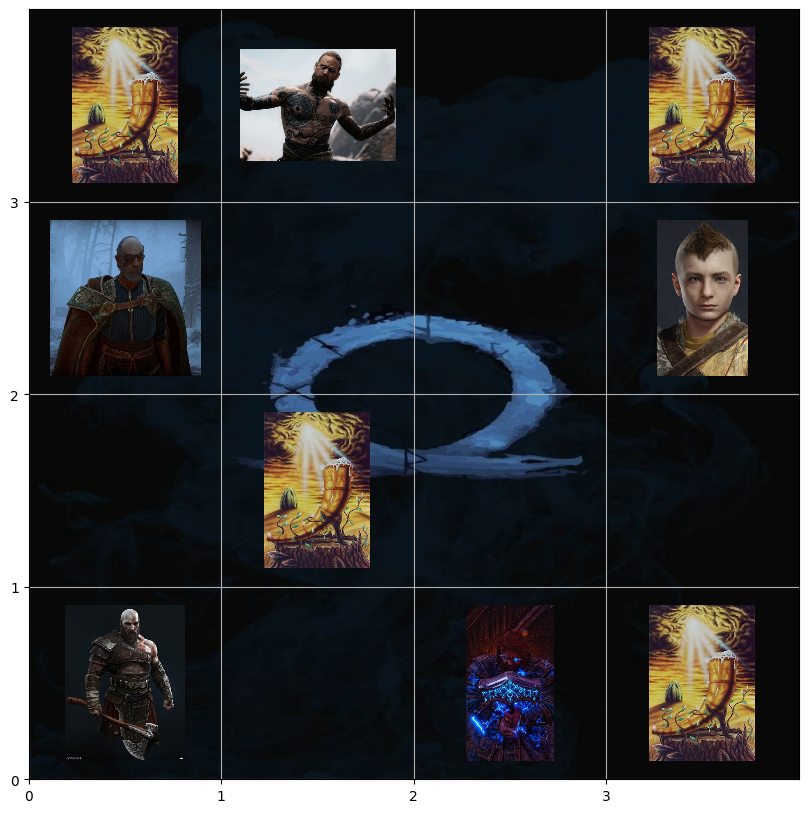

In [5]:
environment = GodOfWar()
environment.reset()
environment.render(plot=True)

#Stochastic Environment and Random Agent


In [8]:
def make_environment_stochastic(environment):
    original_step = environment.step

    def stochastic_step(action):
        # Introduce randomness:
        if np.random.rand() < 0.9:  #90% chance
            return original_step(action)
        else:  #10% chance to take a random action
            random_action = environment.action_space.sample()
            return original_step(random_action)

    environment.step = stochastic_step

#**Q-Learning**

In [10]:
def Q_learning(environment, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon):

    environment_width = environment.environment_width
    num_states = environment_width * environment_width
    num_actions = environment.action_space.n
    q_table = np.zeros((num_states, num_actions))
    rewards_all_episodes = []
    epsilon_values = []

    print("Initial Q-table:")
    print(q_table)

    for episode in range(num_episodes):

        #State was in 2-D state so we have to convert it to 1-D index for representing in the Q-table:

        state_2d = environment.reset()
        state = state_2d[0] * environment_width + state_2d[1]
        total_rewards = 0

        for step in range(max_steps_per_episode):
            exploration_rate_threshold = np.random.uniform(0, 1)
            if exploration_rate_threshold < epsilon:
                action = environment.action_space.sample()  #Exploration
            else:
                action = np.argmax(q_table[state, :])  #Exploitation

            new_state_2d, reward, done, _ = environment.step(action)
            #Convert the new 2-D state to a 1-D index
            new_state = new_state_2d[0] * environment_width + new_state_2d[1]
            total_rewards += reward

            #Updating Q-Table
            q_table[state, action] = q_table[state, action] * (1 - alpha) + \
                                     alpha * (reward + gamma * np.max(q_table[new_state, :]))

            state = new_state  #Update state to the new state

            if done:
                break

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        rewards_all_episodes.append(total_rewards)
        epsilon_values.append(epsilon)

        print(f"Episode: {episode}, Reward: {total_rewards}, Epsilon: {epsilon}")

    return q_table, rewards_all_episodes, epsilon_values


#Q-Learning for deterministic environment

In [11]:
num_episodes = 1000
max_steps_per_episode = 100
alpha = 0.1  #Learning rate
gamma = 0.75  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

#Training on the deterministic environment
deterministic_env = GodOfWar()

q_table, rewards_all_episodes_Q_d, epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: -27, Epsilon: 0.995
Episode: 1, Reward: -167, Epsilon: 0.990025
Episode: 2, Reward: -174, Epsilon: 0.985074875
Episode: 3, Reward: 76, Epsilon: 0.9801495006250001
Episode: 4, Reward: -51, Epsilon: 0.9752487531218751
Episode: 5, Reward: -93, Epsilon: 0.9703725093562657
Episode: 6, Reward: -180, Epsilon: 0.9655206468094844
Episode: 7, Reward: -118, Epsilon: 0.960693043575437
Episode: 8, Reward: -148, Epsilon: 0.9558895783575597
Episode: 9, Reward: 83, Epsilon: 0.9511101304657719
Episode: 10, Reward: 52, Epsilon: 0.946354579813443
Episode: 11, Reward: -232, Epsilon: 0.9416228069143757
Episode: 12, Reward: -104, Epsilon: 0.9369146928798039
Episode: 13, Reward: -270, Epsilon: 0.9322301194154049
Episode: 14, Reward: -1

In [12]:
import pickle

In [13]:
with open('deterministic_Q_table.pkl', 'wb') as file:
    pickle.dump(q_table, file)

In [14]:
print("Q-table:")
print(q_table)

Q-table:
[[ 32.57541758  25.10171348  33.890625    24.94698045]
 [ 45.1875      33.40555202 -14.75637598  25.09765627]
 [ 54.07844007 -27.68949348   1.82488494  11.0321573 ]
 [-11.89785362   2.3955455    1.32633281 -31.77581141]
 [-10.36155434  14.44325216  45.03730349  12.64887764]
 [ 56.25        32.91829901  55.45379092  28.86312723]
 [ 74.94919767 -24.604584    -2.00896786  25.44430069]
 [ 10.17096526   1.62995786  -8.29777708  41.15156744]
 [ 59.21083377   7.82672783  21.28146558  -6.14303305]
 [ 75.          43.40296332  72.7287686    8.1166758 ]
 [ 99.99635646  46.65551093  18.99732291  30.59323017]
 [ 48.68147139  -7.20754947   6.63995065  21.01684214]
 [ 45.7158664   -8.2312082   74.93949111  43.03562647]
 [ 74.04900174  54.76158269 100.          60.62108486]
 [  0.           0.           0.           0.        ]
 [  1.           5.15497516   0.          81.46979811]]


# Total Reward per episode graph:

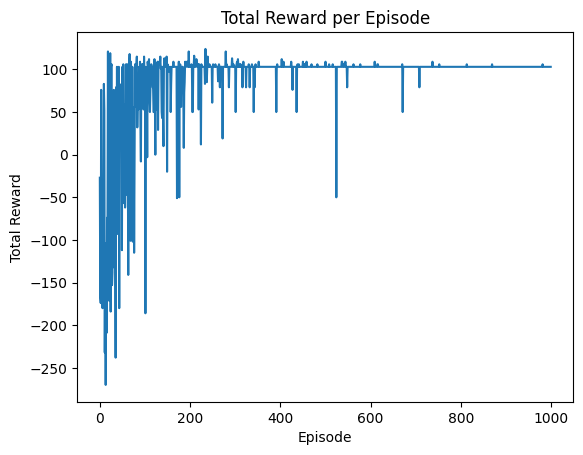

In [15]:
plt.plot(rewards_all_episodes_Q_d)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Epsilon Decay Graph

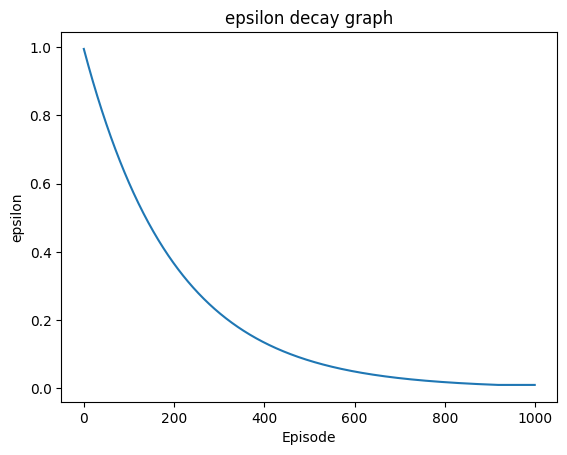

In [16]:
plt.plot(epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

# Greedy Actions

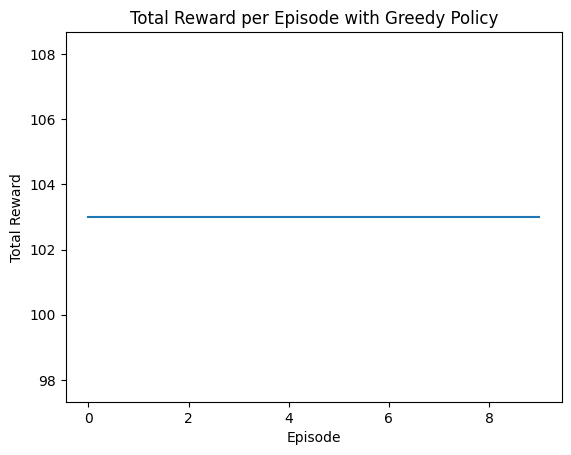

In [16]:
def run_greedy_policy(environment, q_table, num_episodes):
    environment_width = environment.environment_width
    total_rewards = []

    for episode in range(num_episodes):
        state_2d = environment.reset()
        state = state_2d[0] * environment_width + state_2d[1]
        episode_rewards = 0

        for step in range(num_episodes):
            action = np.argmax(q_table[state, :])  #Choosing the max value in the q table
            new_state_2d, reward, done, _ = environment.step(action)
            new_state = new_state_2d[0] * environment_width + new_state_2d[1]
            episode_rewards += reward

            state = new_state
            if done:
                break

        total_rewards.append(episode_rewards)

    return total_rewards

#max_steps_per_episode = 10
num_episodes = 10

total_rewards = run_greedy_policy(deterministic_env, q_table, num_episodes)

plt.plot(total_rewards)
plt.title('Total Reward per Episode with Greedy Policy')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

#Q-Learning for Stochastic Environment

In [69]:
stochastic_environment = GodOfWar()  #Initiate the environment
make_environment_stochastic(environment)  #Apply stochasticity to the environment

num_episodes = 1000
max_steps_per_episode = 10
alpha = 0.1  #Learning rate
gamma = 0.75  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

s_q_table, s_rewards_all_episodes_Q, s_epsilon_values = Q_learning(
    stochastic_environment, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: 0, Epsilon: 0.995
Episode: 1, Reward: -90, Epsilon: 0.990025
Episode: 2, Reward: -199, Epsilon: 0.985074875
Episode: 3, Reward: -196, Epsilon: 0.9801495006250001
Episode: 4, Reward: 0, Epsilon: 0.9752487531218751
Episode: 5, Reward: -129, Epsilon: 0.9703725093562657
Episode: 6, Reward: -44, Epsilon: 0.9655206468094844
Episode: 7, Reward: -44, Epsilon: 0.960693043575437
Episode: 8, Reward: -110, Epsilon: 0.9558895783575597
Episode: 9, Reward: -60, Epsilon: 0.9511101304657719
Episode: 10, Reward: -37, Epsilon: 0.946354579813443
Episode: 11, Reward: -24, Epsilon: 0.9416228069143757
Episode: 12, Reward: 12, Epsilon: 0.9369146928798039
Episode: 13, Reward: 0, Epsilon: 0.9322301194154049
Episode: 14, Reward: -67, Epsil

In [99]:
print("Q-table:")
print(s_q_table)

Q-table:
[[ 32.00570548  25.03449478  33.890625    25.18868558]
 [ 45.1875      32.63555065 -12.60908716  24.50356691]
 [ 54.78431112 -24.66373715   1.17578633  13.97831725]
 [ -8.30308858   0.44306292   1.53219009 -22.10806268]
 [-23.70064802  12.86508167  45.09738189  10.88342746]
 [ 56.25        33.02632543  55.66848876  31.55836856]
 [ 74.99592675 -22.26462893  -9.14406576  23.5662044 ]
 [ 28.2265596    0.3828634   -3.76115375   2.12057926]
 [ 18.90343744   9.59734816   5.70693122 -17.54175044]
 [ 34.39561963  43.78043579  75.         -18.92061323]
 [100.          53.05216689  44.97319255  54.37666699]
 [  9.586165   -10.67458416   5.77612243  71.68896793]
 [ 22.13929542 -17.53509763  14.21900137  11.7145035 ]
 [  0.10738872  53.51854217  19.           7.78513883]
 [  0.           0.           0.           0.        ]
 [  2.65         0.79015936   0.          27.1       ]]


In [21]:
with open('stochastic_Q_table.pkl', 'wb') as file:
    pickle.dump(s_q_table, file)

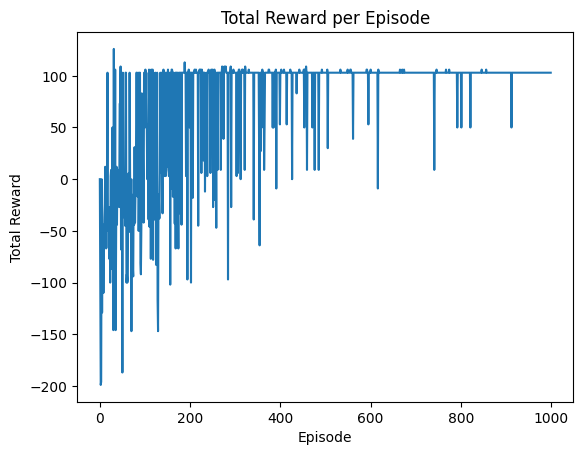

In [71]:
plt.plot(s_rewards_all_episodes_Q)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

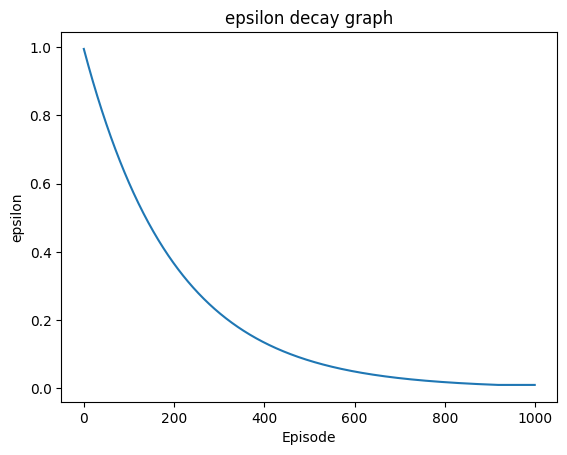

In [20]:
plt.plot(s_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

#Hyperparameter Tuning for gamma

Gamma = 0.80

In [54]:
num_episodes = 800
max_steps_per_episode = 10
alpha = 0.1  #Learning rate
gamma = 0.80  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

# raining on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: 6, Epsilon: 0.995
Episode: 1, Reward: 0, Epsilon: 0.990025
Episode: 2, Reward: -47, Epsilon: 0.985074875
Episode: 3, Reward: 6, Epsilon: 0.9801495006250001
Episode: 4, Reward: -147, Epsilon: 0.9752487531218751
Episode: 5, Reward: -14, Epsilon: 0.9703725093562657
Episode: 6, Reward: -21, Epsilon: 0.9655206468094844
Episode: 7, Reward: 103, Epsilon: 0.960693043575437
Episode: 8, Reward: -50, Epsilon: 0.9558895783575597
Episode: 9, Reward: -27, Epsilon: 0.9511101304657719
Episode: 10, Reward: -67, Epsilon: 0.946354579813443
Episode: 11, Reward: -94, Epsilon: 0.9416228069143757
Episode: 12, Reward: -41, Epsilon: 0.9369146928798039
Episode: 13, Reward: 0, Epsilon: 0.9322301194154049
Episode: 14, Reward: -27, Epsilon: 

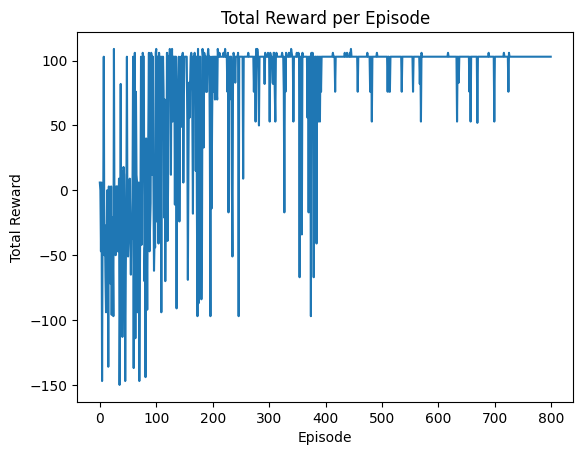

In [55]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

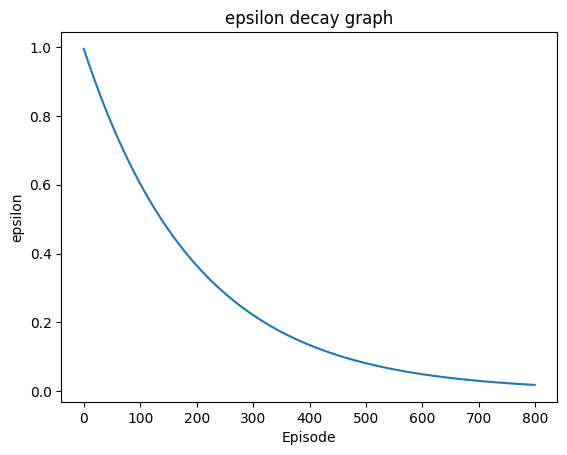

In [56]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

gamma = 0.90

In [57]:
num_episodes = 800
max_steps_per_episode = 10
alpha = 0.1  #Learning rate
gamma = 0.90  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

#Training on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: 40, Epsilon: 0.995
Episode: 1, Reward: 0, Epsilon: 0.990025
Episode: 2, Reward: -27, Epsilon: 0.985074875
Episode: 3, Reward: -41, Epsilon: 0.9801495006250001
Episode: 4, Reward: -78, Epsilon: 0.9752487531218751
Episode: 5, Reward: -70, Epsilon: 0.9703725093562657
Episode: 6, Reward: -94, Epsilon: 0.9655206468094844
Episode: 7, Reward: -54, Epsilon: 0.960693043575437
Episode: 8, Reward: 58, Epsilon: 0.9558895783575597
Episode: 9, Reward: -30, Epsilon: 0.9511101304657719
Episode: 10, Reward: 12, Epsilon: 0.946354579813443
Episode: 11, Reward: -95, Epsilon: 0.9416228069143757
Episode: 12, Reward: 9, Epsilon: 0.9369146928798039
Episode: 13, Reward: 9, Epsilon: 0.9322301194154049
Episode: 14, Reward: 70, Epsilon: 0.9

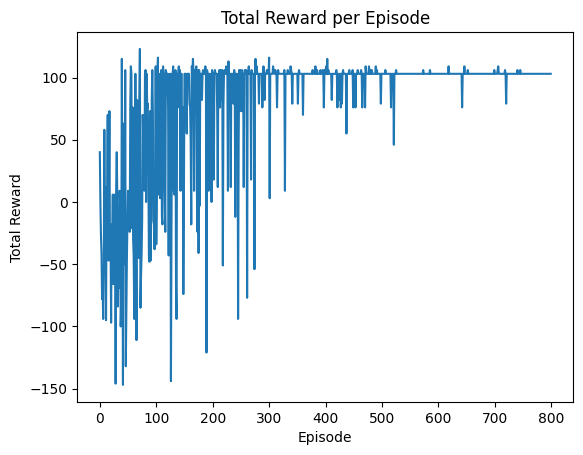

In [58]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

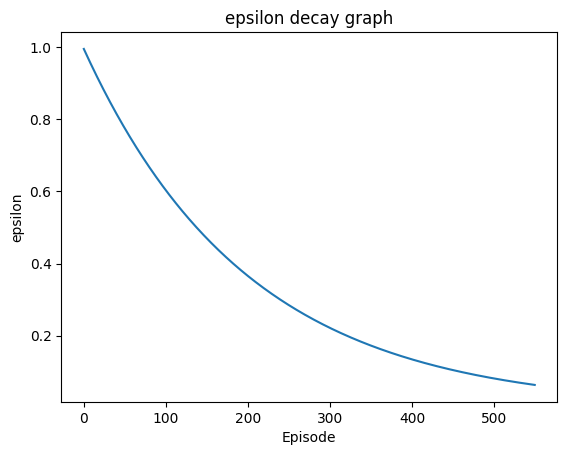

In [26]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

gamma = 0.988

In [59]:
num_episodes = 800
max_steps_per_episode = 10
alpha = 0.1  # Learning rate
gamma = 0.988 # Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

# Training on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: 3, Epsilon: 0.995
Episode: 1, Reward: 0, Epsilon: 0.990025
Episode: 2, Reward: 3, Epsilon: 0.985074875
Episode: 3, Reward: 70, Epsilon: 0.9801495006250001
Episode: 4, Reward: -93, Epsilon: 0.9752487531218751
Episode: 5, Reward: 0, Epsilon: 0.9703725093562657
Episode: 6, Reward: 9, Epsilon: 0.9655206468094844
Episode: 7, Reward: 0, Epsilon: 0.960693043575437
Episode: 8, Reward: -20, Epsilon: 0.9558895783575597
Episode: 9, Reward: -100, Epsilon: 0.9511101304657719
Episode: 10, Reward: -48, Epsilon: 0.946354579813443
Episode: 11, Reward: -47, Epsilon: 0.9416228069143757
Episode: 12, Reward: -44, Epsilon: 0.9369146928798039
Episode: 13, Reward: -15, Epsilon: 0.9322301194154049
Episode: 14, Reward: 9, Epsilon: 0.92756

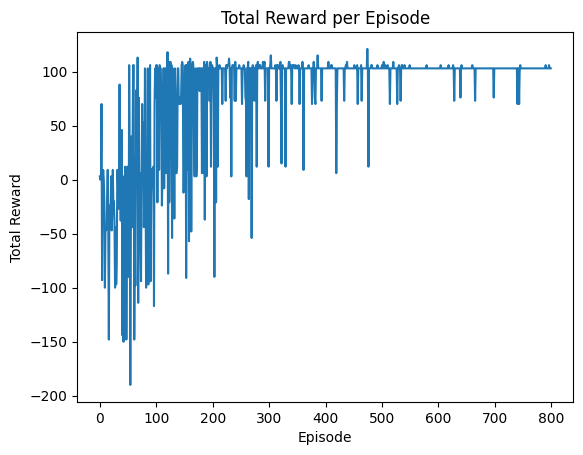

In [60]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

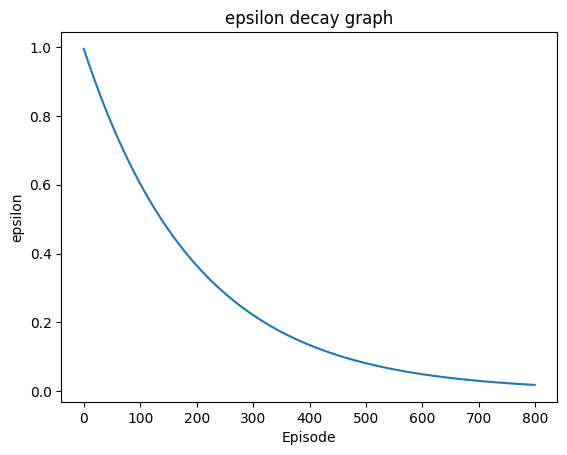

In [61]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

# Hyperparameter Tuning for Max time steps

##Max time steps : 100

In [43]:
num_episodes = 1000
max_steps_per_episode = 100
alpha = 0.1  #Learning rate
gamma = 0.988  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

#Training on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: -250, Epsilon: 0.995
Episode: 1, Reward: 3, Epsilon: 0.990025
Episode: 2, Reward: -57, Epsilon: 0.985074875
Episode: 3, Reward: -142, Epsilon: 0.9801495006250001
Episode: 4, Reward: -125, Epsilon: 0.9752487531218751
Episode: 5, Reward: 100, Epsilon: 0.9703725093562657
Episode: 6, Reward: -18, Epsilon: 0.9655206468094844
Episode: 7, Reward: -8, Epsilon: 0.960693043575437
Episode: 8, Reward: -135, Epsilon: 0.9558895783575597
Episode: 9, Reward: -214, Epsilon: 0.9511101304657719
Episode: 10, Reward: 109, Epsilon: 0.946354579813443
Episode: 11, Reward: 64, Epsilon: 0.9416228069143757
Episode: 12, Reward: 0, Epsilon: 0.9369146928798039
Episode: 13, Reward: -27, Epsilon: 0.9322301194154049
Episode: 14, Reward: 55, Epsi

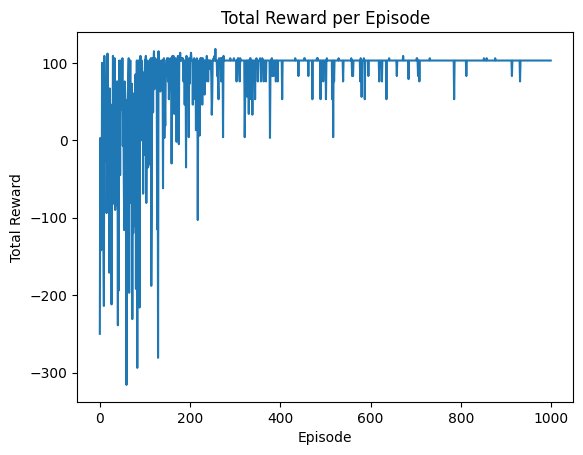

In [44]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

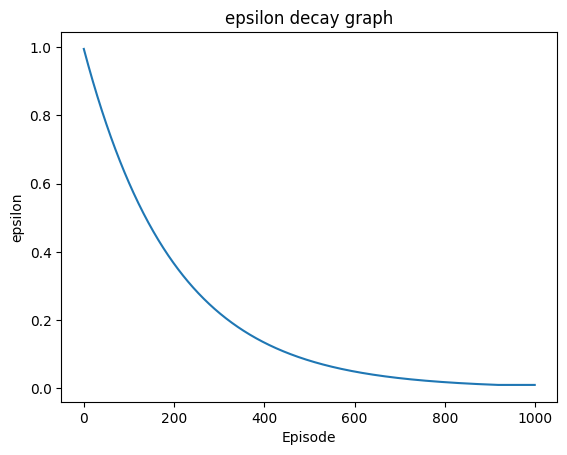

In [45]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

Max Time steps : 130

In [46]:
num_episodes = 1000
max_steps_per_episode = 130
epsilon_decay = 0.995
min_epsilon = 0.01
epsilon = 1.0
alpha = 0.1  #Learning rate
gamma = 0.988  #Discount factor


#Training on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: -81, Epsilon: 0.995
Episode: 1, Reward: 106, Epsilon: 0.990025
Episode: 2, Reward: -5, Epsilon: 0.985074875
Episode: 3, Reward: 39, Epsilon: 0.9801495006250001
Episode: 4, Reward: -47, Epsilon: 0.9752487531218751
Episode: 5, Reward: 17, Epsilon: 0.9703725093562657
Episode: 6, Reward: -230, Epsilon: 0.9655206468094844
Episode: 7, Reward: -57, Epsilon: 0.960693043575437
Episode: 8, Reward: -275, Epsilon: 0.9558895783575597
Episode: 9, Reward: -388, Epsilon: 0.9511101304657719
Episode: 10, Reward: 53, Epsilon: 0.946354579813443
Episode: 11, Reward: -111, Epsilon: 0.9416228069143757
Episode: 12, Reward: 36, Epsilon: 0.9369146928798039
Episode: 13, Reward: -155, Epsilon: 0.9322301194154049
Episode: 14, Reward: -244, E

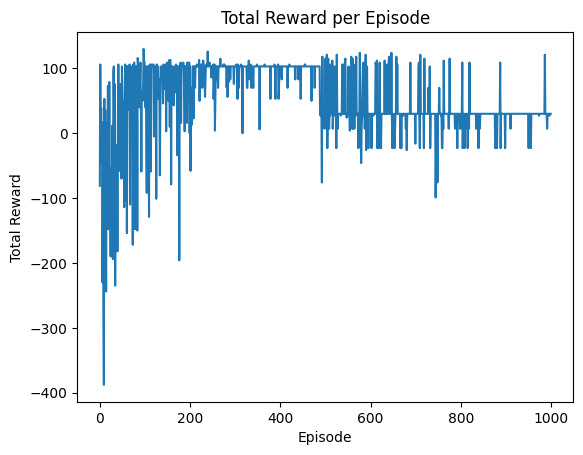

In [47]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

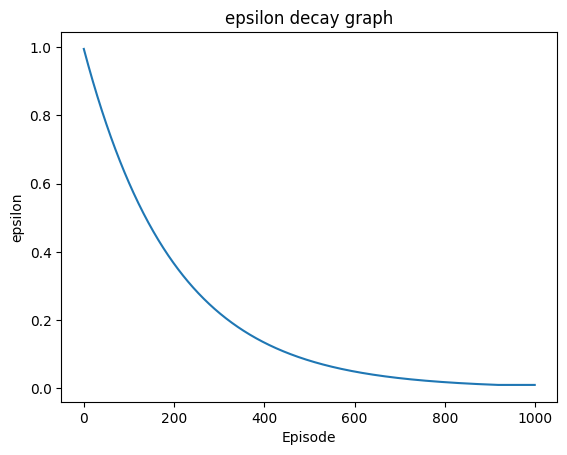

In [48]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()

##Max Time Steps = 200

In [49]:
num_episodes = 1000
max_steps_per_episode = 200
alpha = 0.1  #Learning rate
gamma = 0.988  #Discount factor
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

#Training on the deterministic environment
deterministic_env = GodOfWar()

d_q_table, d_rewards_all_episodes, d_epsilon_values = Q_learning(
    deterministic_env, num_episodes, max_steps_per_episode, alpha, gamma, epsilon, epsilon_decay, min_epsilon)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode: 0, Reward: -229, Epsilon: 0.995
Episode: 1, Reward: 13, Epsilon: 0.990025
Episode: 2, Reward: -118, Epsilon: 0.985074875
Episode: 3, Reward: -30, Epsilon: 0.9801495006250001
Episode: 4, Reward: -87, Epsilon: 0.9752487531218751
Episode: 5, Reward: -72, Epsilon: 0.9703725093562657
Episode: 6, Reward: 103, Epsilon: 0.9655206468094844
Episode: 7, Reward: -395, Epsilon: 0.960693043575437
Episode: 8, Reward: -285, Epsilon: 0.9558895783575597
Episode: 9, Reward: -93, Epsilon: 0.9511101304657719
Episode: 10, Reward: 53, Epsilon: 0.946354579813443
Episode: 11, Reward: -112, Epsilon: 0.9416228069143757
Episode: 12, Reward: -334, Epsilon: 0.9369146928798039
Episode: 13, Reward: 112, Epsilon: 0.9322301194154049
Episode: 14, Reward: -22

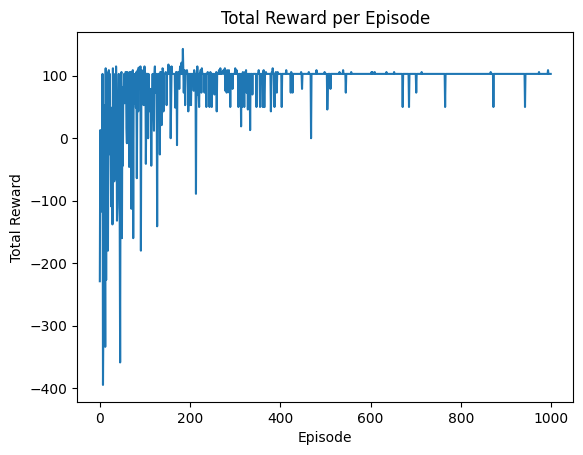

In [50]:
plt.plot(d_rewards_all_episodes)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

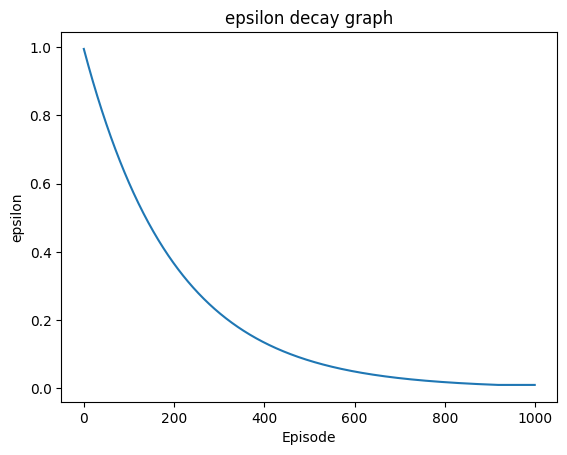

In [51]:
plt.plot(d_epsilon_values)
plt.title('epsilon decay graph')
plt.xlabel('Episode')
plt.ylabel('epsilon')
plt.show()